# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定

## （1）因子1：ROC20，20日变动速率(20-day Price Rate of Change). 是一个动能指标，其以当日的收盘价和N天前的收盘价比较，通过计算股价某一段时间内收盘价变动的比例，应用价格的移动比较来测量价位动量

In [240]:
import warnings
warnings.filterwarnings('ignore')

from time import time

from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()

## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance',
         'freq':'1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

In [241]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1H = HFDataView()
dv1H.create_init_dv(Time_dict.dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.


In [335]:
import matplotlib.pyplot as plt
import pandas as pd

def Plot_Mean(dv, ROC, ROC_MA1, ROC_MA2, chart_name='dv_alpha', n=0):
    fig,(ax,ax1,ax2) = plt.subplots(3,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b')
    ax1.plot(ROC.iloc[n:], alpha=1)
    ax2.plot(ROC_MA1.iloc[n:], alpha=1)
    ax2.plot(ROC_MA2.iloc[n:], alpha=3)
    plt.show()

In [243]:
dv1H.add_formula('ROC20', '((close/Delay(close, 20))-1)*100' , add_data=True)

symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,NaN


In [376]:
roc20_ma1 = dv1H.add_formula('roc20_ma1', 'Ts_Mean(ROC20,10)',add_data=True)
roc20_ma2 = dv1H.add_formula('roc20_ma2', 'Ts_Mean(ROC20,35)', add_data=True)

Field [roc20_ma1] is overwritten.
Field [roc20_ma2] is overwritten.


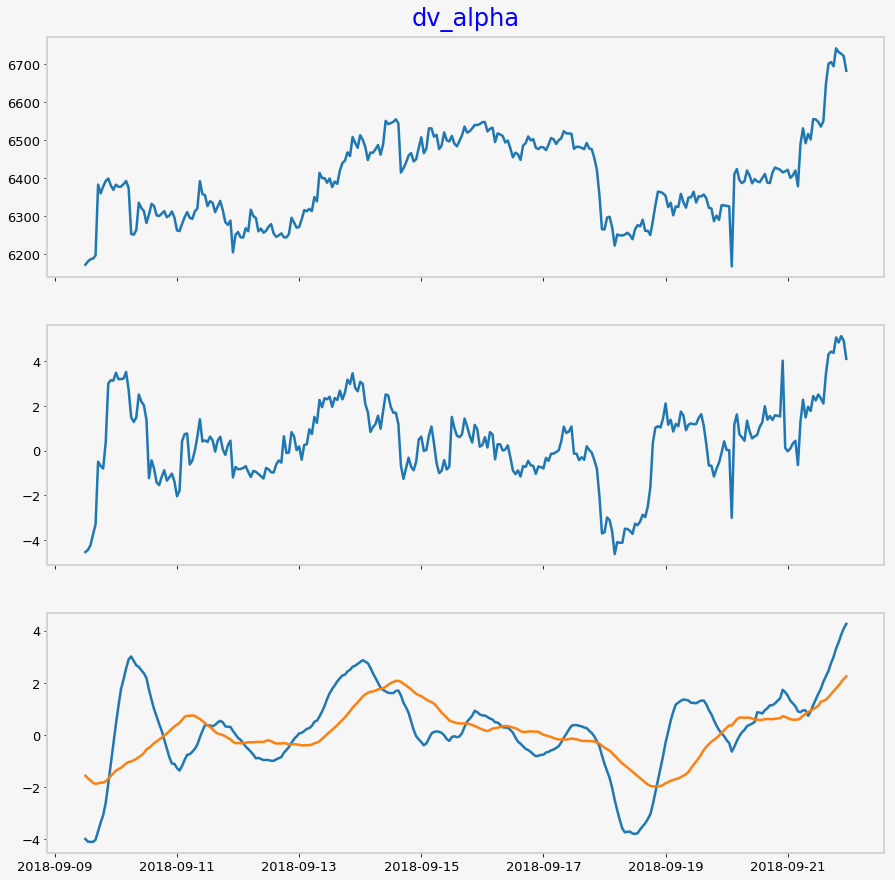

In [377]:
roc = dv1H.get_ts('ROC20', date_type='datetime')
roc20_ma1 = dv1H.get_ts('roc20_ma1', date_type='datetime')
roc20_ma2 = dv1H.get_ts('roc20_ma2', date_type='datetime')

Plot_Mean(dv1H, roc.iloc[:,0], roc20_ma1.iloc[:,0], roc20_ma2.iloc[:,0], n=-300)

### 对比BTCUSDT收盘价与其ROC20指标的图表，发现ROC20与标的物价格图在趋势上能够部分吻合，主要表现为ROC20几乎领先或与标的物价格变动趋势一致；对ROC20进行短期和长期MA处理，通过ROC20指标的短期和长期MA的组合来确定进出场时机。当短期MA上穿长期时，作为多单信号；短期MA下穿长期时，为空单信号。

## （2）因子2：alpha191 - alpha27，wma

In [330]:
dv1H.add_formula("alpha27","Ta('WMA',0,0,0,0,(close-Delay(close,3))/Delay(close,3)*100+(close-Delay(close,6))/Delay(close,6)*100,0,12)",add_data=True)

symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,NaN


In [349]:
a27_ma1 = dv1H.add_formula('a27_ma1', 'Ts_Mean(alpha27,4)',add_data=True)
a27_ma2 = dv1H.add_formula('a27_ma2', 'Ts_Mean(alpha27,20)', add_data=True)

Field [a27_ma1] is overwritten.
Field [a27_ma2] is overwritten.


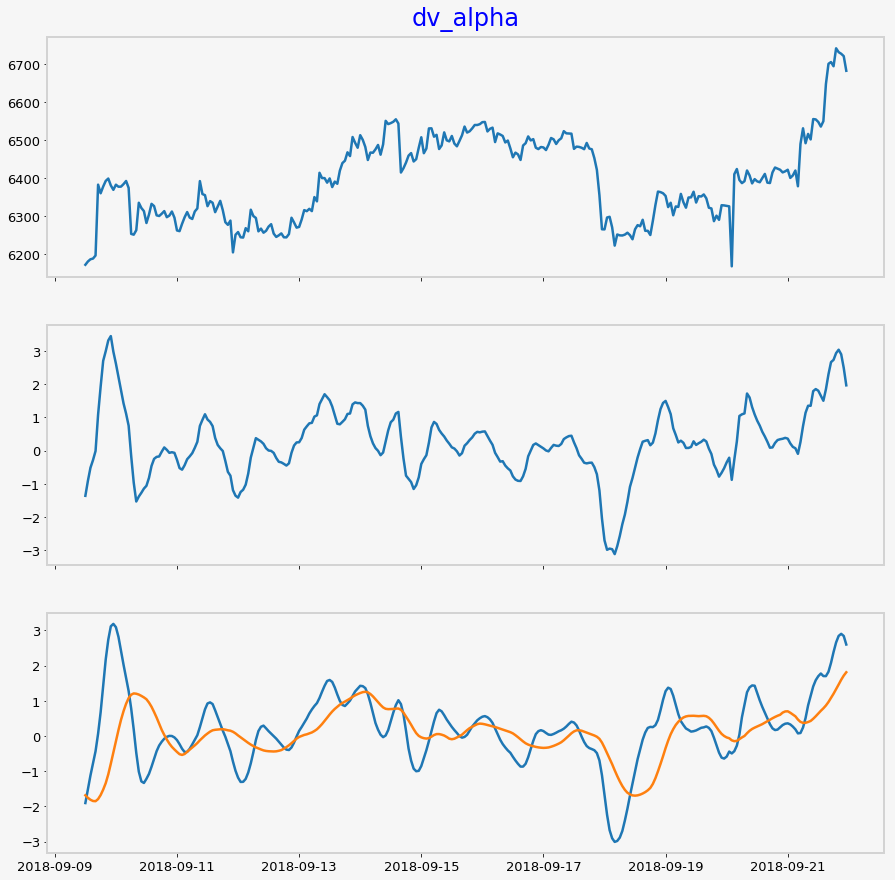

In [350]:
a27 = dv1H.get_ts('alpha27', date_type='datetime')
a27_ma1 = dv1H.get_ts('a27_ma1', date_type='datetime')
a27_ma2 = dv1H.get_ts('a27_ma2', date_type='datetime')

Plot_Mean(dv1H, a27.iloc[:,0], a27_ma1.iloc[:,0], a27_ma2.iloc[:,0], n=-300)

### 根据标的物价格图以及alpha27因子的变动可知，我们仍可以对alpha27因子做短期长期均线处理，进而来判断入场信号

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

### （1）ROC20因子与价格图的联系比较简单且直接，即ROC20因子有一定的领先趋势，会在一定程度先于标的价格图发生同向变动，故我们可以通过对ROC20因子设置短期（4日、20日）的MA金叉死叉策略来对BTCUSDT的多空进行有效预测并套利，假设的信号为金叉买入、死叉卖出；

### （2）alpha27因子与ROC因子较为相似，都具有一定的预测标的物走势的能力，故对alpha27因子设置短期、长期（4日、20日）的MA，金叉死叉策略作为假设信号。

# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来

### （1）ROC20因子

In [384]:
dv1H.add_formula('ROC20', '((close/Delay(close, 20))-1)*100' , add_data=True)

# 进场信号

long = dv1H.add_formula("longROC20","If((Ts_Mean(ROC20,4)>Ts_Mean(ROC20,20)) && (Delay(Ts_Mean(ROC20,4),1)<=Delay(Ts_Mean(ROC20,20),1)),2,0)", add_data=True)
short = dv1H.add_formula("shortROC20","If((Ts_Mean(ROC20,4)<Ts_Mean(ROC20,20)) && (Delay(Ts_Mean(ROC20,4),1)>=Delay(Ts_Mean(ROC20,20),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLongROC20","If(shortROC20==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShortROC20","If(longROC20==2,-1,0)", add_data=True)

Field [ROC20] is overwritten.
Field [longROC20] is overwritten.
Field [shortROC20] is overwritten.
Field [closeLongROC20] is overwritten.
Field [closeShortROC20] is overwritten.


In [385]:
dv1H.get_ts('longROC20').stack()[dv1H.get_ts('longROC20').stack()==2].tail()

trade_date      symbol         
20180916040000  BTCUSDT:binance    2.0
20180917030000  BTCUSDT:binance    2.0
20180918150000  BTCUSDT:binance    2.0
20180920060000  BTCUSDT:binance    2.0
20180921080000  BTCUSDT:binance    2.0
dtype: float64

In [233]:
from jaqs_fxdayu.research import TimingDigger

tdMa = TimingDigger(output_folder=".", output_format='pdf',signal_name='Ma')

def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [386]:
from jaqs_fxdayu.research import TimingDigger

tdAlpha1 = TimingDigger(output_folder=".", output_format='pdf',signal_name='ROC20')

TimingSignal(tdAlpha1, dv1H,'longROC20','shortROC20','closeLongROC20','closeShortROC20', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%


In [387]:
tdAlpha1.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.469  -5.417   1.770
p-value              0.000   0.000   0.081
mean                 0.014  -0.009   0.004
std                  0.017   0.010   0.018
info_ratio           0.844  -0.943   0.203
skewness             1.881  -1.666   1.123
kurtosis             2.865   1.841   3.056
pct5                 0.001  -0.031  -0.025
pct25                0.003  -0.012  -0.005
pct50                0.008  -0.005   0.002
pct75                0.017  -0.003   0.010
pct95                0.052  -0.002   0.037
occurance           43.000  34.000  77.000
win_ratio              NaN     NaN   0.558
win_mean/loss_mean     NaN     NaN   1.500


In [388]:
tdAlpha1.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.165  -5.907   1.420
p-value              0.000   0.000   0.160
mean                 0.025  -0.016   0.005
std                  0.031   0.016   0.032
info_ratio           0.827  -0.971   0.162
skewness             1.859  -1.595   1.319
kurtosis             3.198   2.468   3.666
pct5                 0.001  -0.047  -0.034
pct25                0.004  -0.024  -0.008
pct50                0.015  -0.010   0.001
pct75                0.035  -0.005   0.015
pct95                0.094  -0.001   0.058
occurance           40.000  38.000  78.000
win_ratio              NaN     NaN   0.513
win_mean/loss_mean     NaN     NaN   1.587


In [389]:
tdAlpha1.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               7.067  -7.676    2.117
p-value              0.000   0.000    0.036
mean                 0.020  -0.013    0.004
std                  0.025   0.014    0.026
info_ratio           0.780  -0.911    0.171
skewness             2.264  -1.879    1.451
kurtosis             5.754   3.936    5.368
pct5                 0.001  -0.038   -0.031
pct25                0.004  -0.018   -0.006
pct50                0.010  -0.006    0.001
pct75                0.026  -0.003    0.010
pct95                0.064  -0.001    0.051
occurance           83.000  72.000  155.000
win_ratio              NaN     NaN    0.535
win_mean/loss_mean     NaN     NaN    1.517


### （2）alpha27

In [357]:
# 进场信号
long = dv1H.add_formula("longa27","If((Ts_Mean(alpha27,10)>Ts_Mean(alpha27,25)) && (Delay(Ts_Mean(alpha27,10),1)<=Delay(Ts_Mean(alpha27,25),1)),2,0)", add_data=True)
short = dv1H.add_formula("shorta27","If((Ts_Mean(alpha27,10)<Ts_Mean(alpha27,25)) && (Delay(Ts_Mean(alpha27,10),1)>=Delay(Ts_Mean(alpha27,25),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLonga27","If(shorta27==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShorta27","If(longa27==2,-1,0)", add_data=True)

Field [longa27] is overwritten.
Field [shorta27] is overwritten.
Field [closeLonga27] is overwritten.
Field [closeShorta27] is overwritten.


In [358]:
dv1H.get_ts('longa27').stack()[dv1H.get_ts('longa27').stack()==2].tail()

trade_date      symbol         
20180915080000  BTCUSDT:binance    2.0
20180917000000  BTCUSDT:binance    2.0
20180918140000  BTCUSDT:binance    2.0
20180920070000  BTCUSDT:binance    2.0
20180921100000  BTCUSDT:binance    2.0
dtype: float64

In [359]:
from jaqs_fxdayu.research import TimingDigger

tdAlpha3 = TimingDigger(output_folder=".", output_format='pdf',signal_name='alpha191_alpha27')

TimingSignal(tdAlpha3, dv1H,'longa27','shorta27','closeLonga27','closeShorta27', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%


In [360]:
tdAlpha3.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               6.029  -4.927   1.874
p-value              0.000   0.000   0.065
mean                 0.019  -0.011   0.005
std                  0.019   0.012   0.022
info_ratio           1.005  -0.885   0.227
skewness             1.249  -1.753   0.636
kurtosis             0.914   2.184   1.474
pct5                 0.001  -0.040  -0.028
pct25                0.005  -0.013  -0.006
pct50                0.011  -0.007   0.001
pct75                0.026  -0.003   0.013
pct95                0.056  -0.001   0.047
occurance           37.000  32.000  69.000
win_ratio              NaN     NaN   0.536
win_mean/loss_mean     NaN     NaN   1.709


In [361]:
tdAlpha3.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.203  -5.566   1.598
p-value              0.000   0.000   0.115
mean                 0.026  -0.017   0.006
std                  0.031   0.017   0.033
info_ratio           0.855  -1.000   0.192
skewness             1.739  -1.758   1.143
kurtosis             2.489   2.643   2.888
pct5                 0.002  -0.054  -0.037
pct25                0.005  -0.021  -0.010
pct50                0.011  -0.011   0.002
pct75                0.036  -0.006   0.017
pct95                0.094  -0.001   0.070
occurance           38.000  32.000  70.000
win_ratio              NaN     NaN   0.543
win_mean/loss_mean     NaN     NaN   1.532


In [362]:
tdAlpha3.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               7.525  -7.297    2.367
p-value              0.000   0.000    0.019
mean                 0.023  -0.014    0.006
std                  0.026   0.015    0.028
info_ratio           0.875  -0.919    0.202
skewness             1.929  -1.898    1.129
kurtosis             4.023   3.493    3.675
pct5                 0.001  -0.048   -0.035
pct25                0.005  -0.016   -0.008
pct50                0.011  -0.009    0.001
pct75                0.032  -0.005    0.013
pct95                0.073  -0.001    0.055
occurance           75.000  64.000  139.000
win_ratio              NaN     NaN    0.540
win_mean/loss_mean     NaN     NaN    1.605


# *策略通用性测试

### （1）ROC20 因子

In [288]:
start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'EOSUSDT:binance',
         'freq':'4H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

In [292]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1h = HFDataView()

In [293]:
dv1h.create_init_dv(Time_dict.dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.


In [396]:
dv1h.add_formula('ROC20', '((close/Delay(close, 20))-1)*100' , add_data=True)

# 进场信号
long = dv1h.add_formula("longROC20","If((Ts_Mean(ROC20,10)>Ts_Mean(ROC20,35)) && (Delay(Ts_Mean(ROC20,10),1)<=Delay(Ts_Mean(ROC20,35),1)),2,0)", add_data=True)
short = dv1h.add_formula("shortROC20","If((Ts_Mean(ROC20,10)<Ts_Mean(ROC20,35)) && (Delay(Ts_Mean(ROC20,10),1)>=Delay(Ts_Mean(ROC20,35),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1h.add_formula("closeLongROC20","If(shortROC20==-2,1,0)", add_data=True)
close_short = dv1h.add_formula("closeShortROC20","If(longROC20==2,-1,0)", add_data=True)

Field [ROC20] is overwritten.
Field [longROC20] is overwritten.
Field [shortROC20] is overwritten.
Field [closeLongROC20] is overwritten.
Field [closeShortROC20] is overwritten.


In [397]:
dv1h.get_ts('longROC20').stack()[dv1h.get_ts('longROC20').stack()==2].tail()

trade_date      symbol         
20180804080000  EOSUSDT:binance    2.0
20180813000000  EOSUSDT:binance    2.0
20180825080000  EOSUSDT:binance    2.0
20180910000000  EOSUSDT:binance    2.0
20180921080000  EOSUSDT:binance    2.0
dtype: float64

In [398]:
from jaqs_fxdayu.research import TimingDigger

tdAlpha2 = TimingDigger(output_folder=".", output_format='pdf',signal_name='ROC20')

TimingSignal(tdAlpha2, dv1h,'longROC20','shortROC20','closeLongROC20','closeShortROC20', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%


In [399]:
tdAlpha2.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              4.357 -4.139  0.913
p-value             0.049  0.009  0.388
mean                0.273 -0.056  0.053
std                 0.089  0.030  0.165
info_ratio          3.081 -1.851  0.323
skewness           -0.675  0.403  0.889
kurtosis           -1.500 -1.225 -0.907
pct5                0.166 -0.091 -0.090
pct25               0.236 -0.081 -0.070
pct50               0.324 -0.062 -0.029
pct75               0.335 -0.035  0.148
pct95               0.344 -0.012  0.337
occurance           3.000  6.000  9.000
win_ratio             NaN    NaN  0.333
win_mean/loss_mean    NaN    NaN  4.840


In [400]:
tdAlpha2.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                      win   loss     all
t-stat              5.228 -2.928   2.382
p-value             0.002  0.100   0.041
mean                0.150 -0.055   0.088
std                 0.070  0.026   0.111
info_ratio          2.134 -2.070   0.794
skewness           -0.668  0.685  -0.238
kurtosis            0.319 -1.500  -1.357
pct5                0.045 -0.075  -0.073
pct25               0.140 -0.073  -0.011
pct50               0.154 -0.070   0.140
pct75               0.175 -0.044   0.155
pct95               0.239 -0.023   0.229
occurance           7.000  3.000  10.000
win_ratio             NaN    NaN   0.700
win_mean/loss_mean    NaN    NaN   2.746


In [401]:
tdAlpha2.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win   loss     all
t-stat               5.912 -5.408   2.167
p-value              0.000  0.001   0.044
mean                 0.187 -0.056   0.072
std                  0.095  0.029   0.141
info_ratio           1.971 -1.912   0.511
skewness             0.094  0.463   0.479
kurtosis            -0.394 -1.252  -1.063
pct5                 0.065 -0.090  -0.086
pct25                0.145 -0.076  -0.062
pct50                0.155 -0.070   0.006
pct75                0.242 -0.029   0.155
pct95                0.336 -0.011   0.326
occurance           10.000  9.000  19.000
win_ratio              NaN    NaN   0.526
win_mean/loss_mean     NaN    NaN   3.348


### （2）alpha27

In [370]:
# 进场信号
long = dv1h.add_formula("longa27","If((Ts_Mean(alpha27,4)>Ts_Mean(alpha27,20)) && (Delay(Ts_Mean(alpha27,4),1)<=Delay(Ts_Mean(alpha27,20),1)),2,0)", add_data=True)
short = dv1h.add_formula("shorta27","If((Ts_Mean(alpha27,4)<Ts_Mean(alpha27,20)) && (Delay(Ts_Mean(alpha27,4),1)>=Delay(Ts_Mean(alpha27,20),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1h.add_formula("closeLonga27","If(shorta27==-2,1,0)", add_data=True)
close_short = dv1h.add_formula("closeShorta27","If(longa27==2,-1,0)", add_data=True)

In [371]:
dv1h.get_ts('longa27').stack()[dv1h.get_ts('longa27').stack()==2].tail()

trade_date      symbol         
20180828000000  EOSUSDT:binance    2.0
20180901160000  EOSUSDT:binance    2.0
20180907200000  EOSUSDT:binance    2.0
20180913160000  EOSUSDT:binance    2.0
20180919120000  EOSUSDT:binance    2.0
dtype: float64

In [372]:
tdAlpha3 = TimingDigger(output_folder=".", output_format='pdf',signal_name='a33')

TimingSignal(tdAlpha3, dv1h,'longa27','shorta27','closeLonga27','closeShorta27', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%


In [373]:
tdAlpha3.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               2.527  -9.325   0.014
p-value              0.030   0.000   0.989
mean                 0.069  -0.058   0.000
std                  0.086   0.021   0.087
info_ratio           0.799  -2.692   0.003
skewness             1.779   0.383   1.832
kurtosis             2.416  -0.237   3.813
pct5                 0.004  -0.091  -0.087
pct25                0.010  -0.070  -0.059
pct50                0.026  -0.059  -0.018
pct75                0.100  -0.052   0.020
pct95                0.214  -0.019   0.120
occurance           11.000  13.000  24.000
win_ratio              NaN     NaN   0.458
win_mean/loss_mean     NaN     NaN   1.191


In [374]:
tdAlpha3.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.931  -4.540   1.946
p-value              0.002   0.001   0.063
mean                 0.094  -0.044   0.039
std                  0.090   0.029   0.099
info_ratio           1.050  -1.513   0.397
skewness             1.215   0.155   1.169
kurtosis             0.193  -1.575   0.876
pct5                 0.005  -0.079  -0.072
pct25                0.034  -0.068  -0.017
pct50                0.073  -0.052   0.024
pct75                0.100  -0.014   0.077
pct95                0.262  -0.006   0.241
occurance           15.000  10.000  25.000
win_ratio              NaN     NaN   0.600
win_mean/loss_mean     NaN     NaN   2.167


In [375]:
tdAlpha3.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               4.685  -9.349   1.465
p-value              0.000   0.000   0.149
mean                 0.084  -0.052   0.020
std                  0.089   0.026   0.095
info_ratio           0.937  -1.993   0.211
skewness             1.410   0.444   1.424
kurtosis             0.901  -0.871   1.821
pct5                 0.004  -0.090  -0.080
pct25                0.019  -0.070  -0.053
pct50                0.054  -0.054   0.003
pct75                0.105  -0.034   0.056
pct95                0.290  -0.006   0.240
occurance           26.000  23.000  49.000
win_ratio              NaN     NaN   0.531
win_mean/loss_mean     NaN     NaN   1.621
